In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os



In [6]:
IMG_WIDTH, IMG_HEIGHT = 48, 48
BATCH_SIZE = 64
EPOCHS = 50

train_dir = r'D:\AIML\fer2013\preprocess\train'
test_dir = r'D:\AIML\fer2013\preprocess\test'


In [7]:
augmentation_params = {        # Move to constants in future
    "rotation_range": 10,
    "zoom_range": [0.1, 1.2],
    "width_shift_range": 0.1,
    "height_shift_range": 0.1,
    "shear_range": 0.1,
    "horizontal_flip": True,
    "fill_mode": 'nearest',
    "brightness_range": [0.8, 1.2],
    "channel_shift_range": 30.0
}

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2, **augmentation_params)
val_datagen = ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)



Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


In [1]:
augmentation_params = {        # Move to constants in future
    "rotation_range": 10,
    "zoom_range": [0.9, 1.1],
    "width_shift_range": 0.1,
    "height_shift_range": 0.1,
    "shear_range": 0.1,
    "horizontal_flip": True,
    "fill_mode": 'nearest',
    "brightness_range": [0.9, 1.1]
}

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Epoch 1/70
359/359 [==============================] - 322s 880ms/step - loss: 2.8733 - categorical_accuracy: 0.1468 - val_loss: 2.0427 - val_categorical_accuracy: 0.1683 - lr: 1.0000e-04
Epoch 2/70
359/359 [==============================] - 51s 142ms/step - loss: 2.5868 - categorical_accuracy: 0.1508 - val_loss: 2.0680 - val_categorical_accuracy: 0.1583 - lr: 9.9955e-05
Epoch 3/70
359/359 [==============================] - 54s 151ms/step - loss: 2.4257 - categorical_accuracy: 0.1563 - val_loss: 2.0820 - val_categorical_accuracy: 0.0300 - lr: 9.9819e-05
Epoch 4/70
359/359 [==============================] - 60s 168ms/step - loss: 2.3363 - categorical_accuracy: 0.1545 - val_loss: 1.9737 - val_categorical_accuracy: 0.1618 - lr: 9.9593e-05
Epoch 5/70
359/359 [==============================] - 55s 154ms/step - loss: 2.2569 - categorical_accuracy: 0.1660 - val_loss: 1.9547 - val_categorical_accuracy: 0.1716 -

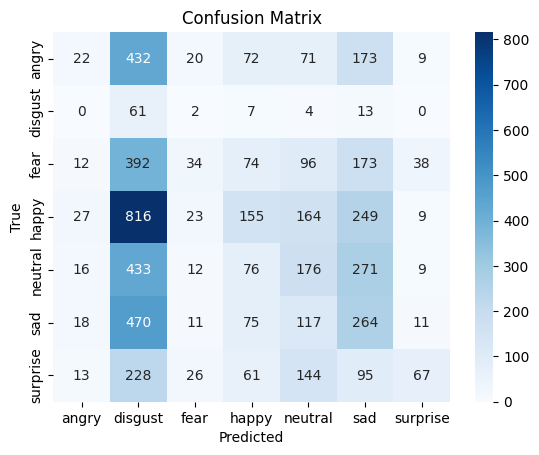

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- CONFIG ---
BATCH_SIZE = 64
IMG_SIZE = (48, 48)
EPOCHS = 70
NUM_CLASSES = 7
TRAIN_DIR = r'D:\AIML\fer2013\preprocess\train'

# --- DATASET ---
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    **augmentation_params
)

train_gen = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='grayscale',
    subset='training',
    shuffle= True,
    seed = 42
)

val_gen = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='grayscale',
    subset='validation',
    shuffle=False,
    seed = 42
)

# --- CLASS WEIGHTS ---
y_labels = train_gen.classes
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_labels), y=y_labels)
class_weights_dict = dict(enumerate(class_weights))

# --- MODEL ---
def build_final_custom_model(input_shape=(48, 48, 1), num_classes=7):
    model = models.Sequential()

    # Block 1
    model.add(layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    # Block 2
    model.add(layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.30))

    # Block 3
    model.add(layers.Conv2D(256, (3, 3), padding='same', kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.Conv2D(256, (3, 3), padding='same', kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.35))

    # Block 4 (new)
    model.add(layers.Conv2D(512, (3, 3), padding='same', kernel_initializer='he_normal'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dropout(0.4))

    # Dense Layers
    model.add(layers.Dense(384, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

model = build_final_custom_model()

# --- COMPILE ---
initial_lr = 1e-4
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=initial_lr),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.05),
    metrics=[tf.keras.metrics.CategoricalAccuracy(name='categorical_accuracy')]
)

# --- CALLBACKS ---
cosine_lr = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-5 + 0.5 * (initial_lr - 1e-5) * (1 + np.cos(np.pi * epoch / EPOCHS))
)

callbacks = [
    cosine_lr,
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint("best_model_final.h5", save_best_only=True, monitor='val_categorical_accuracy', mode='max')
]

# --- TRAIN ---
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    class_weight=class_weights_dict,
    callbacks=callbacks
)

# --- EVALUATE ---
loss, acc = model.evaluate(val_gen)
print(f"\n✅ Final Validation Accuracy: {acc:.4f}")

# --- CLASSIFICATION REPORT ---
val_gen.reset()
y_true = val_gen.classes
y_pred = model.predict(val_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
labels = list(val_gen.class_indices.keys())

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=labels))

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [1]:
# ✅ 1. Imports
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Conv2D, BatchNormalization, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

import shutil
import random
from tqdm import tqdm


In [2]:
# ------------------------- Constants -------------------------
IMG_SIZE = (48, 48)
BATCH_SIZE = 8
EPOCHS = 70
TRAIN_DIR = r'D:\AIML\fer2013\preprocess\train'
TEST_DIR = r'D:\AIML\fer2013\preprocess\test'
NUM_CLASSES = 7
SEED=42

augmentation_params = {
    "rotation_range": 10,
    "zoom_range": [0.1, 1.2],
    "width_shift_range": 0.1,
    "height_shift_range": 0.1,
    "shear_range": 0.1,
    "horizontal_flip": True,
    "fill_mode": 'nearest',
    "brightness_range": [0.8, 1.2],
    "channel_shift_range": 30.0
}


In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=[0.19, 1.1],
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],
    channel_shift_range=30.0,
    validation_split=0.2  # ← Split from train
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# 🔁 Flow from directory
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=SEED,
    subset='training'
)

val_generator = val_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False,
    seed=SEED,
    subset='validation'
)


Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 46, 46, 64)        640       
                                                                 
 batch_normalization_3 (Batc  (None, 46, 46, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 23, 23, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 batch_normalization_4 (Batc  (None, 21, 21, 128)     

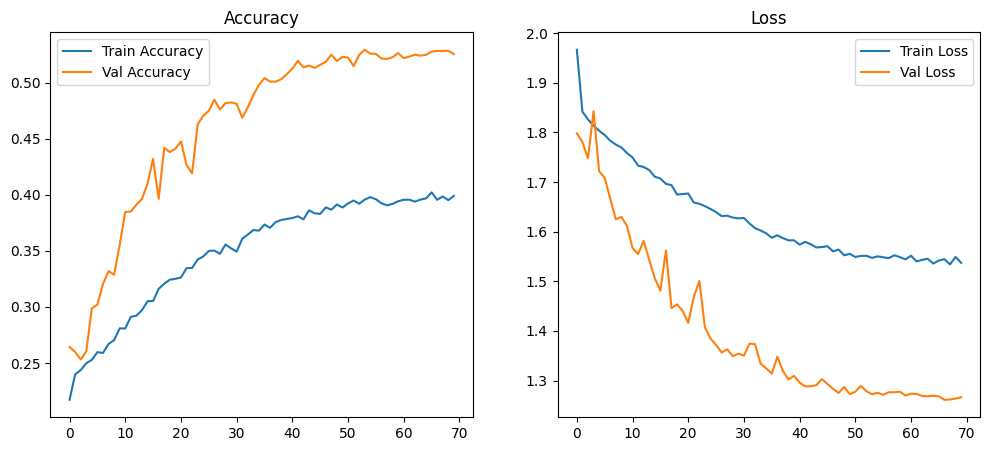

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense, Activation

def build_deep_cnn(input_shape=(48, 48, 1), num_classes=7):
    model = Sequential()

    # Block 1
    model.add(Conv2D(64, (3, 3), padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Block 2
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Block 3
    model.add(Conv2D(256, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(256, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Fully Connected
    model.add(Flatten())
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model

model = build_deep_cnn(input_shape=(48, 48, 1), num_classes=NUM_CLASSES)

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

model.summary()

# 🧪 Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# 🚀 Model Training
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    callbacks=[early_stop, lr_reduce],
    verbose=1
)

# 📈 Plotting Accuracy/Loss Curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['categorical_accuracy'], label='Train Accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")

plt.show()
